Correlation -  
Relation between two variables. It is measred using Pearson coefficient which ranges from [-1, +1].  

For any given two variables X and Y :  
If the coefficient is 1, the realtion between two variables is positive (if X increases/decreases, Y increases/decreases respectively).  
If the coefficient is -1, the realtion between two variables is negative (if X decreases/increases, Y increases/decreases respectively).  
If the coefficient is 0, there is no realtion between two variables (if X increases/decreases, Y may/maynot show any changes).  


In Time-Series we take the main series values with its own lagged values for correlation. This is Auto-Correlation.  

# Auto Regression Integrated Moving Average (ARIMA) -  

Since Auto-Regression and Moving-Average models shouldn't be applied on series with trends and seasonality, this ARIMA model includes the method of differencing (to de-seasonalize and de-trendify data series). It is good for handling trends but not seasonality.  

Steps-  
-> We 1st remove the trend from series using differencing method. To remove non-linear trend from the series, wee have to do differencing several times.  
-> Now we apply auto regression on this new series to get initial set of forecasting.    
-> Using the initial forecast we find the residuals and forecast errors. Then we apply moving average method on these residuals to update our forecast.  
-> Now we do de-differencing (adding back the lag values to our forecast to add the trend effect).  

Parameters-  
-> P (Order of Auto-Regression) - How many lag values to choose.  
-> D (Order of Integration) - Number of differencing needed.  
-> Q (Order of Moving-Average) - Window size of moving average.  



In [148]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from datetime import datetime 
from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima.model import ARIMA 

In [149]:
# dateparse = lambda x: pd.to_datetime(x, format='%d-%m') 
# shm_data = pd.read_csv('../Datasets/shampoo.csv', header=0, parse_dates=[0], date_format=dateparse)  

# shm_data = pd.read_csv('../Datasets/shampoo.csv', header=0, parse_dates=[0])  
shm_data = pd.read_csv('../Datasets/shampoo.csv', header=0)  
shm_data['Month'] = '190' + shm_data['Month'] 
dateparse = lambda x: datetime.strptime('190' + x, '%Y-%m') 

shm_data

,Month,Sales
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3
5,1901-06,168.5
6,1901-07,231.8
7,1901-08,224.5
8,1901-09,192.8
9,1901-10,122.9


<Axes: >

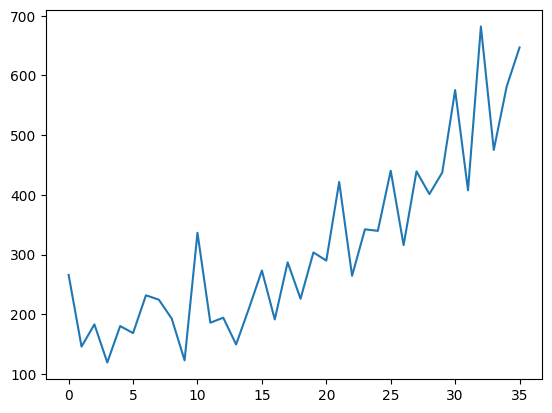

In [150]:
shm_data['Sales'].plot() 

Since this plot states that the trend is polynomial, we will have to use two differencing to make it stationary. (D = 2)   

Autocorrelation plot - 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

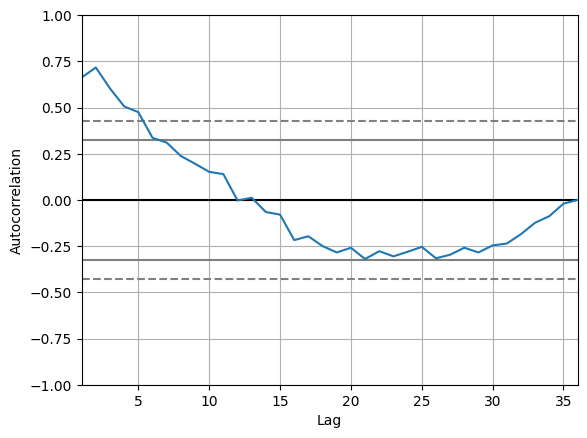

In [151]:
autocorrelation_plot(shm_data['Sales']) 

For autocorrelation, if the autocorrelation plot is crossing at the confidence interval line, take the X-axis point from the intersection.  
(Q = 5)  

Partial Auto-Correlation Plot -   

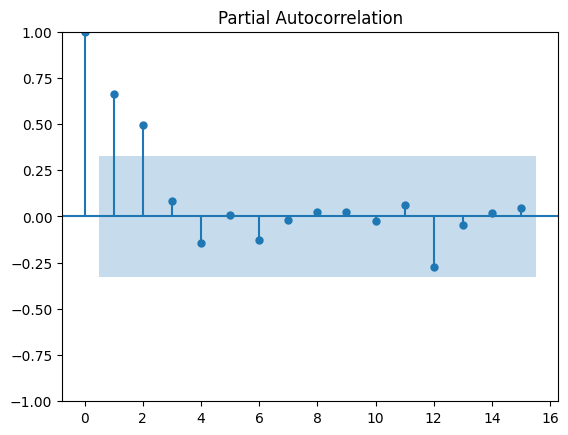

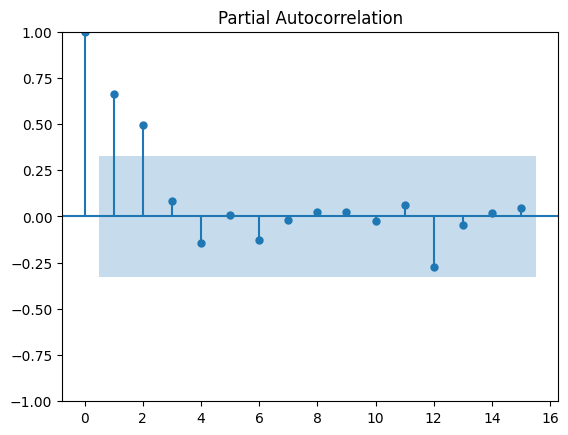

In [152]:
plot_pacf(shm_data['Sales'], lags=15) 

Blue band (default) shown is the confidence interval over here.  
  
Here, the partial autocorrelation is crossing the confidence interval at value 3 (within 2 and 4).  
So 'P' for our ARIMA model is : (P = 2)  
  
Since the lag_n lines where the confidence interval begins is within lag2 and lag3 lines on the graph.  
(D = 2)  

# ARIMA Model -  

In [153]:
arima_model = ARIMA(shm_data['Sales'], order=(2, 2, 5))    # order = (P, D, Q) 
arima = arima_model.fit()
arima.summary() 

d:\Machine_Learning_PY\virtl_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Mon, 30 Jun 2025   AIC                            395.269
Time:                        00:59:32   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.741      0.000      -2.391      -1.425
ar.L2         -0.9544      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.784     -0.003      0.997     -38.845      38.709
ma.L2         -1.8461      2.765     -0.668      0.504      -7.266       3.573
ma.L3          0.3024     19.731      0.015      0.988     -38.369      38.974
ma.L4          0.9883      2.797      0.353      0.724      -4.494       6.470
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5829      0.014   1.95e+05      0.000    2696.556    2696.610
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.18e+22. Standard errors may be unstable.
"""

In [154]:
residuals = arima.resid
residuals

0     266.000000
1    -251.672182
2     145.276049
3      24.465374
4      81.910693
5      69.818329
6     103.749814
7      65.031648
8      13.101735
9     -96.890923
10    150.078807
11    -12.832551
12    -28.044773
13    -95.898234
14     -0.759154
15     32.161050
16      8.256665
17     20.000572
18     41.113800
19     18.767440
20     82.872013
21    114.882951
22     11.847189
23    -17.575907
24     16.191984
25     58.282834
26    -65.509383
27     22.929743
28    -45.944380
29     10.116640
30     66.125692
31    -33.299035
32    107.996375
33    -13.008085
34    -42.602930
35     79.014251
dtype: float64

In [155]:
residuals.describe() 

count     36.000000
mean      25.165392
std       86.508507
min     -251.672182
25%      -14.150040
50%       19.384006
75%       72.117309
max      266.000000
dtype: float64

<Axes: >

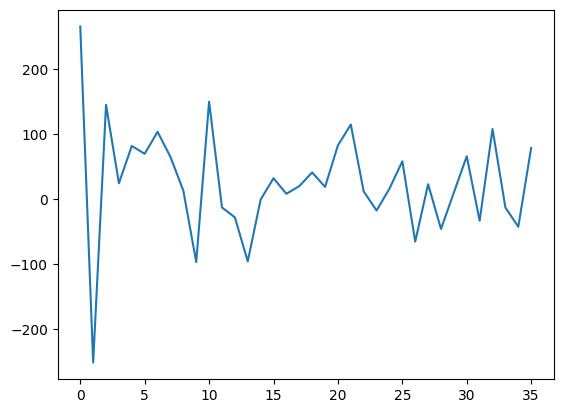

In [156]:
residuals.plot()

In [157]:
op = arima.forecast()
op

36    656.794812
dtype: float64

In [158]:
arima.forecast(7)

36    656.794812
37    637.267082
38    712.227544
39    710.393591
40    755.777057
41    784.368794
42    799.931549
Name: predicted_mean, dtype: float64

Variations -  
  
ARIMA -  
model = ARIMA(df[column], order = (p, d, q))  

Autoregression -  
model = ARIMA(df[column], order = (p, d, 0))  

Correlation model -  
model = ARIMA(df[column], order = (0, d, q))  



# Walk-Forward Validation on ARIMA -  

train and test split

In [159]:
shm_data.shape

(36, 2)

In [160]:
train_size_shm = int(shm_data.shape[0] * 0.7)     # 70% 
train_size_shm 

25

In [161]:
train, test = shm_data.Sales[0:train_size_shm], shm_data.Sales[train_size_shm:] 
print(train.shape) 
print(test.shape) 

(25,)
(11,)


Walk-forward validation

In [162]:
data = train
predict = [] 

for t in test:
    model = ARIMA(data, order=(5,1,0)) 
    m_fit = model.fit() 
    y = m_fit.forecast() 
    print(y) 
    predict.append(y) 
    data = np.append(data, t) 
    data = pd.Series(data) 


25    368.668956
dtype: float64
26    335.044741
dtype: float64
27    363.220222
dtype: float64
28    357.645324
dtype: float64
29    443.047835
dtype: float64
30    378.365674
dtype: float64
31    459.41502
dtype: float64
32    526.890876
dtype: float64
33    457.231275
dtype: float64
34    672.914943
dtype: float64
35    531.541449
dtype: float64


In [163]:
print(len(predict)) 
predict 

11


[25    368.668956
 dtype: float64,
 26    335.044741
 dtype: float64,
 27    363.220222
 dtype: float64,
 28    357.645324
 dtype: float64,
 29    443.047835
 dtype: float64,
 30    378.365674
 dtype: float64,
 31    459.41502
 dtype: float64,
 32    526.890876
 dtype: float64,
 33    457.231275
 dtype: float64,
 34    672.914943
 dtype: float64,
 35    531.541449
 dtype: float64]

In [164]:
mse = mean_squared_error(test.values, predict) 
mse 

9170.052430073367